In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from statsmodels.tsa.seasonal import seasonal_decompose


In [66]:
df = pd.read_csv('./data/W_N-U-Z24.csv')
str_detail = "W_N-U-Z24"
# df.info
df.head(10)

,Timestamp.2024,2024,Timestamp.2023,2023,Timestamp.2022,2022,Timestamp.2021,2021,Timestamp.2020,2020,...,Timestamp.2008,2008,Timestamp.2007,2007,Timestamp.2006,2006,Timestamp.2005,2005,Timestamp.2004,2004
0,2023-02-19,7.25,2022-02-19,NaN,2021-02-19,4.75,2020-02-19,4.25,2019-02-19,4.75,...,2007-02-19,NaN,2006-02-19,NaN,2005-02-19,NaN,2004-02-19,NaN,2003-02-19,NaN
1,2023-02-20,7.25,2022-02-20,NaN,2021-02-20,NaN,2020-02-20,4.00,2019-02-20,5.00,...,2007-02-20,NaN,2006-02-20,NaN,2005-02-20,NaN,2004-02-20,NaN,2003-02-20,NaN
2,2023-02-21,7.25,2022-02-21,NaN,2021-02-21,NaN,2020-02-21,4.00,2019-02-21,5.75,...,2007-02-21,NaN,2006-02-21,NaN,2005-02-21,NaN,2004-02-21,NaN,2003-02-21,NaN
3,2023-02-22,6.75,2022-02-22,7.00,2021-02-22,4.75,2020-02-22,NaN,2019-02-22,6.00,...,2007-02-22,NaN,2006-02-22,NaN,2005-02-22,NaN,2004-02-22,NaN,2003-02-22,NaN
4,2023-02-23,6.75,2022-02-23,9.25,2021-02-23,8.25,2020-02-23,NaN,2019-02-23,NaN,...,2007-02-23,NaN,2006-02-23,NaN,2005-02-23,NaN,2004-02-23,NaN,2003-02-23,NaN
5,2023-02-24,5.25,2022-02-24,11.75,2021-02-24,7.75,2020-02-24,3.25,2019-02-24,NaN,...,2007-02-24,NaN,2006-02-24,NaN,2005-02-24,NaN,2004-02-24,NaN,2003-02-24,NaN
6,2023-02-25,6.75,2022-02-25,8.50,2021-02-25,8.00,2020-02-25,3.50,2019-02-25,5.00,...,2007-02-25,NaN,2006-02-25,NaN,2005-02-25,NaN,2004-02-25,NaN,2003-02-25,NaN
7,2023-02-26,6.75,2022-02-26,NaN,2021-02-26,7.25,2020-02-26,3.00,2019-02-26,4.25,...,2007-02-26,NaN,2006-02-26,NaN,2005-02-26,NaN,2004-02-26,NaN,2003-02-26,NaN
8,2023-02-27,6.75,2022-02-27,NaN,2021-02-27,NaN,2020-02-27,3.00,2019-02-27,5.00,...,2007-02-27,NaN,2006-02-27,NaN,2005-02-27,NaN,2004-02-27,NaN,2003-02-27,NaN
9,2023-02-28,6.50,2022-02-28,10.00,2021-02-28,NaN,2020-02-28,3.50,2019-02-28,5.00,...,2007-02-28,NaN,2006-02-28,NaN,2005-02-28,NaN,2004-02-28,NaN,2003-02-28,NaN


In [58]:
def trend_finder(year):
    temp1 = df[f'Timestamp.{year}']
    temp2 = df[year]
    temp_df = pd.DataFrame({'Timestamp': temp1, 'Value': temp2})
    # temp_df = temp_df.dropna()
    # temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'])
    
    temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'], errors='coerce')
    temp_df = temp_df.dropna(subset=['Timestamp'])

    # Group by year and month
    grouped = temp_df.groupby(temp_df['Timestamp'].dt.to_period('M'))

    # Get first and last rows for each group
    first_last = grouped.agg({'Timestamp': ['first', 'last'], 'Value': ['first', 'last']})

    # Flatten the MultiIndex columns
    first_last.columns = ['First_Date', 'Last_Date', 'Start_Value', 'End_Value']

    # Calculate the difference
    first_last['Value_Difference'] = first_last['Start_Value'] - first_last['End_Value']

    # Reset the index to get a flat DataFrame
    result = first_last.reset_index(drop=True)

    return result

    # return temp_df

In [59]:

# main_df = trend_finder('2010')
# main_df = main_df[['First_Date']]
# main_df = main_df.rename(columns={'First_Date': 'Month'})
# main_df['Month'] = main_df['Month'].dt.month

# for i in range(2010, 2025):
#     result = trend_finder(str(i))  
#     result = result.rename(columns={'Value_Difference': i, 'First_Date': 'Month'})
#     result['Month'] = result['Month'].dt.month
#     result = result.drop(['Last_Date', 'Start_Value', 'End_Value'], axis=1)
#     # main_df = pd.merge(main_df, result, on='Month')
#     # main_df = pd.concat([main_df, result], ignore_index=True)
#     ls = result[i]
#     main_df[i] = ls




# main_df.to_csv('./data/result_'+str_detail+'.csv')
# main_df


In [60]:
def normalize_list(data):
    # Convert data to numpy array to handle NaN values
    data_array = np.array(data, dtype=np.float64)
    
    # Replace NaN values with the median of non-NaN values
    median_value = np.nanmedian(data_array)
    data_array[np.isnan(data_array)] = median_value
    
    # Normalize the data
    min_val = np.min(data_array)
    max_val = np.max(data_array)
    normalized_data = (data_array - min_val) / (max_val - min_val)
    
    return normalized_data.tolist()

In [61]:
main_df = trend_finder('2010')
main_df = main_df[['First_Date']]
main_df = main_df.rename(columns={'First_Date': 'Month'})

# main_df['Month'] = main_df['Month'].dt.month
main_df['Month'] = main_df['Month'].dt.strftime('%m-%Y')

for i in range(2010, 2025):
    result = trend_finder(str(i))  
    result = result.rename(columns={'Value_Difference': i, 'First_Date': 'Month'})
    result['Month'] = result['Month'].dt.month
    result = result.drop(['Last_Date', 'Start_Value', 'End_Value'], axis=1)
    # main_df = pd.merge(main_df, result, on='Month')
    # main_df = pd.concat([main_df, result], ignore_index=True)
    ls = result[i]
    ls = normalize_list(ls)
    main_df[i] = ls
    

mean_row = main_df.iloc[:, 1:].mean(axis=1)
main_df['Mean'] = mean_row
# for i in range(len(main_df)):
#     if main_df.loc[i, 'Month'].year == 2009:
#         main_df.loc[i, 'Month'] = main_df.loc[i, 'Month'].strftime('%m-%Y')[:3] + " (1st)"
#     else:
#         break
# Convert 'Month' column to datetime if it isn't already
# Ensure 'Month' column is in datetime format
main_df['Month'] = pd.to_datetime(main_df['Month'])

# Create a temporary column for string updates
main_df['Month_str'] = main_df['Month'].dt.strftime('%m-%Y')

# Apply the condition and update the temporary column
main_df.loc[main_df['Month'].dt.year == 2009, 'Month_str'] = main_df.loc[main_df['Month'].dt.year == 2009, 'Month_str'].str[:3] + " (1st)"
main_df.loc[main_df['Month'].dt.year == 2010, 'Month_str'] = main_df.loc[main_df['Month'].dt.year == 2010, 'Month_str'].str[:3] + " (2nd)"

# Drop the original 'Month' column if you no longer need it
main_df.drop(columns=['Month'], inplace=True)

# Rename the temporary column back to 'Month'
main_df.rename(columns={'Month_str': 'Month'}, inplace=True)
column_to_move = 'Month'
col = main_df.pop(column_to_move)
main_df.insert(0, column_to_move, col)



main_df.to_csv('./data/result_'+str_detail+'.csv')
main_df


,Month,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Mean
0,02- (1st),0.126354,0.000000,0.676923,0.000000,0.551601,1.000000,0.450,1.000000,0.4625,0.907407,0.263158,0.555556,0.635294,0.170213,0.551724,0.490049
1,03- (1st),0.126354,0.844749,0.584615,0.175610,1.000000,0.000000,0.750,0.000000,0.4125,0.925926,0.421053,0.000000,0.811765,0.127660,0.724138,0.460291
2,04- (1st),1.000000,0.945205,0.230769,0.370732,0.000000,0.644788,0.250,0.428571,0.4750,0.648148,0.000000,0.444444,0.694118,0.595745,0.448276,0.478386
3,05- (1st),0.061372,0.835616,0.553846,1.000000,0.633452,0.652510,0.400,0.457143,0.5625,1.000000,0.473684,0.527778,0.835294,0.000000,0.655172,0.576558
4,06- (1st),0.111913,0.835616,0.276923,0.180488,0.558719,0.648649,1.000,0.314286,0.3125,0.759259,0.105263,0.694444,0.811765,1.000000,0.655172,0.551000
5,07- (1st),0.144404,0.794521,0.615385,0.131707,0.540925,0.567568,0.775,0.457143,0.5000,0.833333,0.315789,0.500000,0.752941,0.553191,0.379310,0.524081
6,08- (1st),0.108303,0.949772,0.384615,0.204878,0.537367,0.559846,0.450,0.514286,0.3625,0.722222,0.631579,0.500000,0.705882,0.255319,0.310345,0.479794
7,09- (1st),0.155235,0.776256,1.000000,0.253659,0.540925,0.621622,0.450,0.714286,0.3625,0.759259,0.368421,0.444444,0.729412,0.148936,0.655172,0.532008
8,10- (1st),0.270758,1.000000,0.646154,0.365854,0.604982,0.660232,0.750,0.714286,0.3500,0.796296,0.526316,0.472222,0.776471,0.638298,0.448276,0.601343
9,11- (1st),0.064982,0.716895,0.246154,0.160976,0.551601,0.617761,0.400,0.514286,0.4750,0.777778,0.368421,0.472222,0.811765,0.446809,0.413793,0.469229


In [62]:
fig = go.Figure()
main_df['Month'] = main_df['Month'].astype(str)
fig.add_trace(go.Scatter(x=main_df['Month'], y=main_df['Mean'], mode='lines+markers',name="Mean"))
fig.add_trace(go.Scatter(x=main_df['Month'], y=main_df[2024], mode='lines+markers',name="2024"))

fig.update_layout(
        title='Wheat Data ' + str_detail,
        xaxis_title='Month',
        yaxis_title='Value'
    )
# pio.write_image(fig, './data/'+str_detail+'.png')
fig.show()

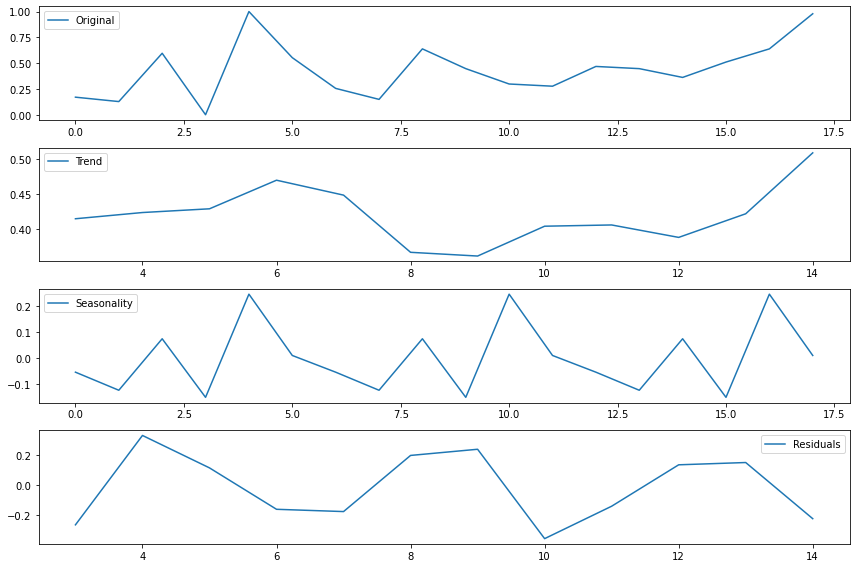

In [65]:
decomposition = seasonal_decompose(main_df[2023], model='additive', period=6)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(main_df[2023], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
